In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

In [299]:
# read data into python as dataframe 
training_data = pd.read_csv(r"C:\Users\GCube ISL\Geoscience (DL, ML, AI)\SPE_NAICE  Project\Facies_data.csv")
training_data

,Facies,Formation,Well Name,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE
0,0,UN_DEF,Honda,1118.0,12.25,-999.2500,50.097000,-999.250000,1.9338,-999.2500,-999.2500,0.112465,0.434061,0.385244
1,0,UN_DEF,Honda,1118.5,12.25,-999.2500,48.171001,-999.250000,1.9327,-999.2500,-999.2500,0.106133,0.434727,0.388588
2,0,UN_DEF,Honda,1119.0,12.25,-999.2500,46.245300,-999.250000,1.9316,-999.2500,-999.2500,0.100007,0.435394,0.391851
3,0,UN_DEF,Honda,1119.5,12.25,-999.2500,48.157799,-999.250000,1.9327,-999.2500,-999.2500,0.106090,0.434727,0.388607
4,0,UN_DEF,Honda,1120.0,12.25,-999.2500,50.070301,-999.250000,1.9338,-999.2500,-999.2500,0.112376,0.434061,0.385283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100252,2,UN_DEF,Volkswagen,7855.0,8.50,8.6867,129.890198,0.292816,2.3077,1.5239,1.3729,0.681831,0.207455,0.066006
100253,2,UN_DEF,Volkswagen,7855.5,8.50,8.7282,126.535400,0.292117,2.3013,1.5605,1.4852,0.639196,0.211333,0.076250
100254,2,UN_DEF,Volkswagen,7856.0,8.50,8.7656,127.410301,0.294720,2.3012,1.5557,1.4870,0.650080,0.211394,0.073971
100255,2,UN_DEF,Volkswagen,7856.5,8.50,8.7283,124.798599,0.301075,2.2983,1.5511,1.4000,0.618065,0.213151,0.081410


In [300]:
#training_data = training_data.drop(['Vsh', 'PHIT', 'PHIE'], axis = 1)

In [301]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100257 entries, 0 to 100256
Data columns (total 14 columns):
Facies        100257 non-null int64
Formation     100257 non-null object
Well Name     100257 non-null object
Depth         100257 non-null float64
BS_COMP       100257 non-null float64
CALI_COMP     100257 non-null float64
GR_COMP       100257 non-null float64
NP_COMP       100257 non-null float64
RHOB_COMP     100257 non-null float64
RSHAL_COMP    100257 non-null float64
RT_COMP       100257 non-null float64
Vsh           100257 non-null float64
PHIT          100257 non-null float64
PHIE          100257 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 10.7+ MB


In [302]:
training_data.isnull().sum()

Facies        0
Formation     0
Well Name     0
Depth         0
BS_COMP       0
             ..
RSHAL_COMP    0
RT_COMP       0
Vsh           0
PHIT          0
PHIE          0
Length: 14, dtype: int64

In [304]:
# Get indexes where Facies column has value -999.25
#indexNames = training_data[training_data['Facies'] == -999.25].index
 
# Delete these row indexes from dataFrame
#training_data.drop(indexNames , inplace=True)

In [305]:
training_data['Well Name'] = training_data['Well Name'].replace(['Ki?'],'Lexus')

In [306]:
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

[Honda, Nissan, Toyota, Ferrari, Lexus, Mercedes, Volkswagen]
Categories (7, object): [Honda, Nissan, Toyota, Ferrari, Lexus, Mercedes, Volkswagen]

In [307]:
facies_colors = ['#FFE600', '#00060A', '#969EA3']

facies_labels = ['Sand', 'Shale', 'Shaly_Sand']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies']]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [308]:
training_data.sample(20)

,Facies,Formation,Well Name,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE,FaciesLabels
26404,1,UN_DEF,Nissan,7177.0,12.25,-999.250000,100.133797,0.360884,2.2719,1.3444,1.4250,0.376846,0.229152,0.142797,Shale
63695,1,UN_DEF,Lexus,1954.0,17.50,20.196199,97.805000,-999.250000,1.9268,-999.2500,0.9597,0.358896,0.438303,0.280998,Shale
40125,1,CALABAR,Toyota,6989.5,12.25,-999.250000,106.109398,-999.250000,2.2908,-999.2500,1.5328,0.426312,0.217697,0.124890,Shale
95436,1,APAPA,Volkswagen,5447.0,12.25,12.452200,119.787003,0.561655,2.2413,0.9757,1.0003,0.560495,0.247697,0.108864,Shale
70824,1,UN_DEF,Lexus,5518.5,12.25,12.986000,114.314499,-999.250000,2.1627,-999.2500,1.3672,0.503016,0.295333,0.146776,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14687,1,UN_DEF,Nissan,1318.5,12.25,-999.250000,110.739800,-999.250000,2.0217,0.5876,1.0468,0.468272,0.380788,0.202476,Shale
7907,1,UN_DEF,Honda,5071.5,12.25,12.298700,108.560997,-999.250000,2.2321,0.9291,0.4490,0.448114,0.253273,0.139778,Shale
83886,0,UN_DEF,Mercedes,7816.0,12.25,12.538000,64.398003,0.381877,2.1431,1.5032,1.2694,0.166609,0.307212,0.256028,Sand
98978,0,UN_DEF,Volkswagen,7218.0,8.50,8.794800,76.271202,0.269492,2.1349,1.1726,1.0623,0.222790,0.312182,0.242631,Sand


In [309]:
training_data.describe()

,Facies,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE
count,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000,100257.000000
mean,0.598262,5029.921352,12.809320,-457.468497,86.323212,-637.855961,-57.798156,-566.948913,-57.002336,0.313430,-59.553470,-59.636308
std,0.543384,2253.630542,5.063289,505.392382,25.783081,480.274799,237.593531,498.507822,237.426819,0.153783,237.150523,237.129620
min,0.000000,881.000000,-999.250000,-999.250000,14.426100,-999.250000,-999.250000,-9999.000000,-999.250000,0.023218,-999.250000,-999.250000
25%,0.000000,3108.500000,12.250000,-999.250000,69.509598,-999.250000,2.041700,-999.250000,0.931900,0.189405,0.228727,0.131576
50%,1.000000,5112.000000,12.250000,11.600000,94.067596,-999.250000,2.169000,-999.250000,1.117200,0.331542,0.276606,0.180246
75%,1.000000,6902.000000,12.250000,12.855400,105.125000,0.359263,2.251600,1.104300,1.336000,0.417811,0.347636,0.266738
max,2.000000,9801.000000,17.500000,25.908199,178.145203,0.830928,2.623200,1283.186279,953.565796,1.662334,0.618182,0.546697


In [310]:
# remove all rows that contains missing value
training_data.replace([-999.25], np.nan, inplace=True)
training_data.isnull().sum()

Facies             0
Formation          0
Well Name          0
Depth              0
BS_COMP            2
                ... 
RT_COMP         5952
Vsh                0
PHIT            6003
PHIE            6003
FaciesLabels       0
Length: 15, dtype: int64

In [311]:
training_data.sample(10)

,Facies,Formation,Well Name,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE,FaciesLabels
12017,1,UN_DEF,Honda,7126.5,12.25,NaN,105.147598,0.362885,2.3225,NaN,2.0164,0.418005,0.198485,0.115517,Shale
6711,2,UN_DEF,Honda,4473.5,12.25,12.362700,130.395401,0.409000,2.2551,NaN,1.1452,0.688466,0.239333,0.074560,Shaly_Sand
44914,1,UN_DEF,Toyota,9384.0,12.25,NaN,92.073303,NaN,2.2600,NaN,0.6282,0.317645,0.236364,0.161284,Shale
5214,0,UN_DEF,Honda,3725.0,12.25,NaN,58.251499,NaN,2.0037,NaN,NaN,0.141708,0.391697,0.336190,Sand
49086,0,UN_DEF,Ferrari,2684.0,17.50,22.450001,40.587299,NaN,1.9650,NaN,0.8500,0.083133,0.415152,0.380639,Sand
21286,0,UN_DEF,Nissan,4618.0,12.25,NaN,86.432404,NaN,2.2187,0.9014,1.3774,0.280809,0.261394,0.187992,Sand
57724,1,UN_DEF,Ferrari,7003.0,8.50,NaN,97.689697,0.430200,2.2730,NaN,1.1500,0.358026,0.228485,0.146681,Shale
96844,2,UN_DEF,Volkswagen,6151.0,12.25,12.449800,125.504898,0.465039,2.3372,1.1430,1.1852,0.626583,0.189576,0.070791,Shaly_Sand
63161,0,UN_DEF,Lexus,1687.0,17.50,18.424101,88.595299,NaN,1.9295,NaN,1.0345,0.294515,0.436667,0.308062,Sand
43828,1,UN_DEF,Toyota,8841.0,12.25,NaN,91.088402,NaN,2.1832,NaN,0.8690,0.310955,0.282909,0.194937,Shale


In [312]:
training_data.fillna(training_data.mean(), inplace=True)

In [313]:
training_data.isnull().sum()

Facies          0
Formation       0
Well Name       0
Depth           0
BS_COMP         0
               ..
RT_COMP         0
Vsh             0
PHIT            0
PHIE            0
FaciesLabels    0
Length: 15, dtype: int64

In [314]:
training_data.head(50)

,Facies,Formation,Well Name,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE,FaciesLabels
0,0,UN_DEF,Honda,1118.0,12.25,13.963978,50.097000,0.399114,1.9338,4.111655,2.467025,0.112465,0.434061,0.385244,Sand
1,0,UN_DEF,Honda,1118.5,12.25,13.963978,48.171001,0.399114,1.9327,4.111655,2.467025,0.106133,0.434727,0.388588,Sand
2,0,UN_DEF,Honda,1119.0,12.25,13.963978,46.245300,0.399114,1.9316,4.111655,2.467025,0.100007,0.435394,0.391851,Sand
3,0,UN_DEF,Honda,1119.5,12.25,13.963978,48.157799,0.399114,1.9327,4.111655,2.467025,0.106090,0.434727,0.388607,Sand
4,0,UN_DEF,Honda,1120.0,12.25,13.963978,50.070301,0.399114,1.9338,4.111655,2.467025,0.112376,0.434061,0.385283,Sand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,UN_DEF,Honda,1140.5,12.25,13.963978,42.978199,0.399114,1.9304,4.111655,2.467025,0.090065,0.436121,0.396842,Sand
46,0,UN_DEF,Honda,1141.0,12.25,13.963978,42.872002,0.399114,1.9303,4.111655,2.467025,0.089751,0.436182,0.397034,Sand
47,0,UN_DEF,Honda,1141.5,12.25,13.963978,42.832199,0.399114,1.9303,4.111655,2.467025,0.089633,0.436182,0.397085,Sand
48,0,UN_DEF,Honda,1142.0,12.25,13.963978,42.792198,0.399114,1.9303,4.111655,2.467025,0.089515,0.436182,0.397137,Sand


In [315]:
blind = training_data[training_data['Well Name'] == 'Honda']
training_data = training_data[training_data['Well Name'] != 'Honda']

In [316]:
training_data.shape

(85784, 15)

In [317]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'BS_COMP', 'CALI_COMP',
       'GR_COMP', 'NP_COMP', 'RHOB_COMP', 'RSHAL_COMP', 'RT_COMP', 'Vsh',
       'PHIT', 'PHIE', 'FaciesLabels'],
      dtype='object')

In [180]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(30, 20))
    
    ax[0].plot(logs.CALI_COMP, logs.Depth, '-', color='red')
    ax[0].plot(logs.BS_COMP, logs.Depth, '-', color='black')
    ax[1].plot(logs.GR_COMP, logs.Depth, '-g')
    ax[2].plot(logs.RT_COMP, logs.Depth, '-', color='blue')
    ax[3].plot(logs.RSHAL_COMP, logs.Depth, '-', color='0.40')
    ax[4].plot(logs.RHOB_COMP, logs.Depth, '-', color='red')
    ax[5].plot(logs.NP_COMP, logs.Depth, '-', color='blue')
    ax[6].plot(logs.Vsh, logs.Depth, '-', color='black')
    ax[7].plot(logs.PHIT, logs.Depth, '-', color='orange')
    ax[8].plot(logs.PHIE, logs.Depth, '-', color='brown')
    im=ax[9].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies, vmin=0,vmax=2)
    
    divider = make_axes_locatable(ax[9])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((9*' ').join(['Sand',
                                 
                                 
                                 
                                 
                                 'Shale', 
                                 
                                 
                                 
                                 
                                 'Shaly_Sand']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    
    ax[0].set_title('Caliper & Bit size', style ='normal')
    ax[0].set_xlabel("inch &        ")
    ax[0].set_xlim(logs.CALI_COMP.min(),logs.CALI_COMP.max())
    ax[0].set_xlabel("           Bit size")
    #ax[0].set_xlim(logs.BS_COMP.min(),logs.BS_COMP.max())
    ax[1].set_title('Gamma Ray', style ='normal')
    ax[1].set_xlabel("API")
    ax[1].set_xlim(logs.GR_COMP.min(),logs.GR_COMP.max())
    ax[2].set_title('Resistivity', style ='normal')
    ax[2].set_xlim(logs.RT_COMP.min(),logs.RT_COMP.max())
    ax[2].set_xlabel("Ohmm")
    ax[3].set_title('Shale Resistivity', style ='normal')
    ax[3].set_xlabel("Ohmm.")
    ax[3].set_xlim(logs.RSHAL_COMP.min(),logs.RSHAL_COMP.max())
    ax[4].set_title('Density', style ='normal')
    ax[4].set_xlabel("g/cm^3")
    ax[4].set_xlim(logs.RHOB_COMP.min(),logs.RHOB_COMP.max())
    ax[5].set_title('Neuron', style ='normal')
    ax[5].set_xlabel("v/v")
    ax[5].set_xlim(0.9, -0.45)
    ax[6].set_title('Vshale', style ='normal')
    ax[6].set_xlabel("fr.")
    ax[6].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    ax[7].set_title('Total Porosity', style ='normal')
    ax[7].set_xlabel("fr.")
    ax[7].set_xlim(logs.PHIT.min(),logs.PHIT.max())
    ax[8].set_title('Effective Porosity', style ='normal')
    ax[8].set_xlabel("fr.")
    ax[8].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[9].set_xlabel('Facies')
    
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[9].set_xticklabels([])
    
    
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

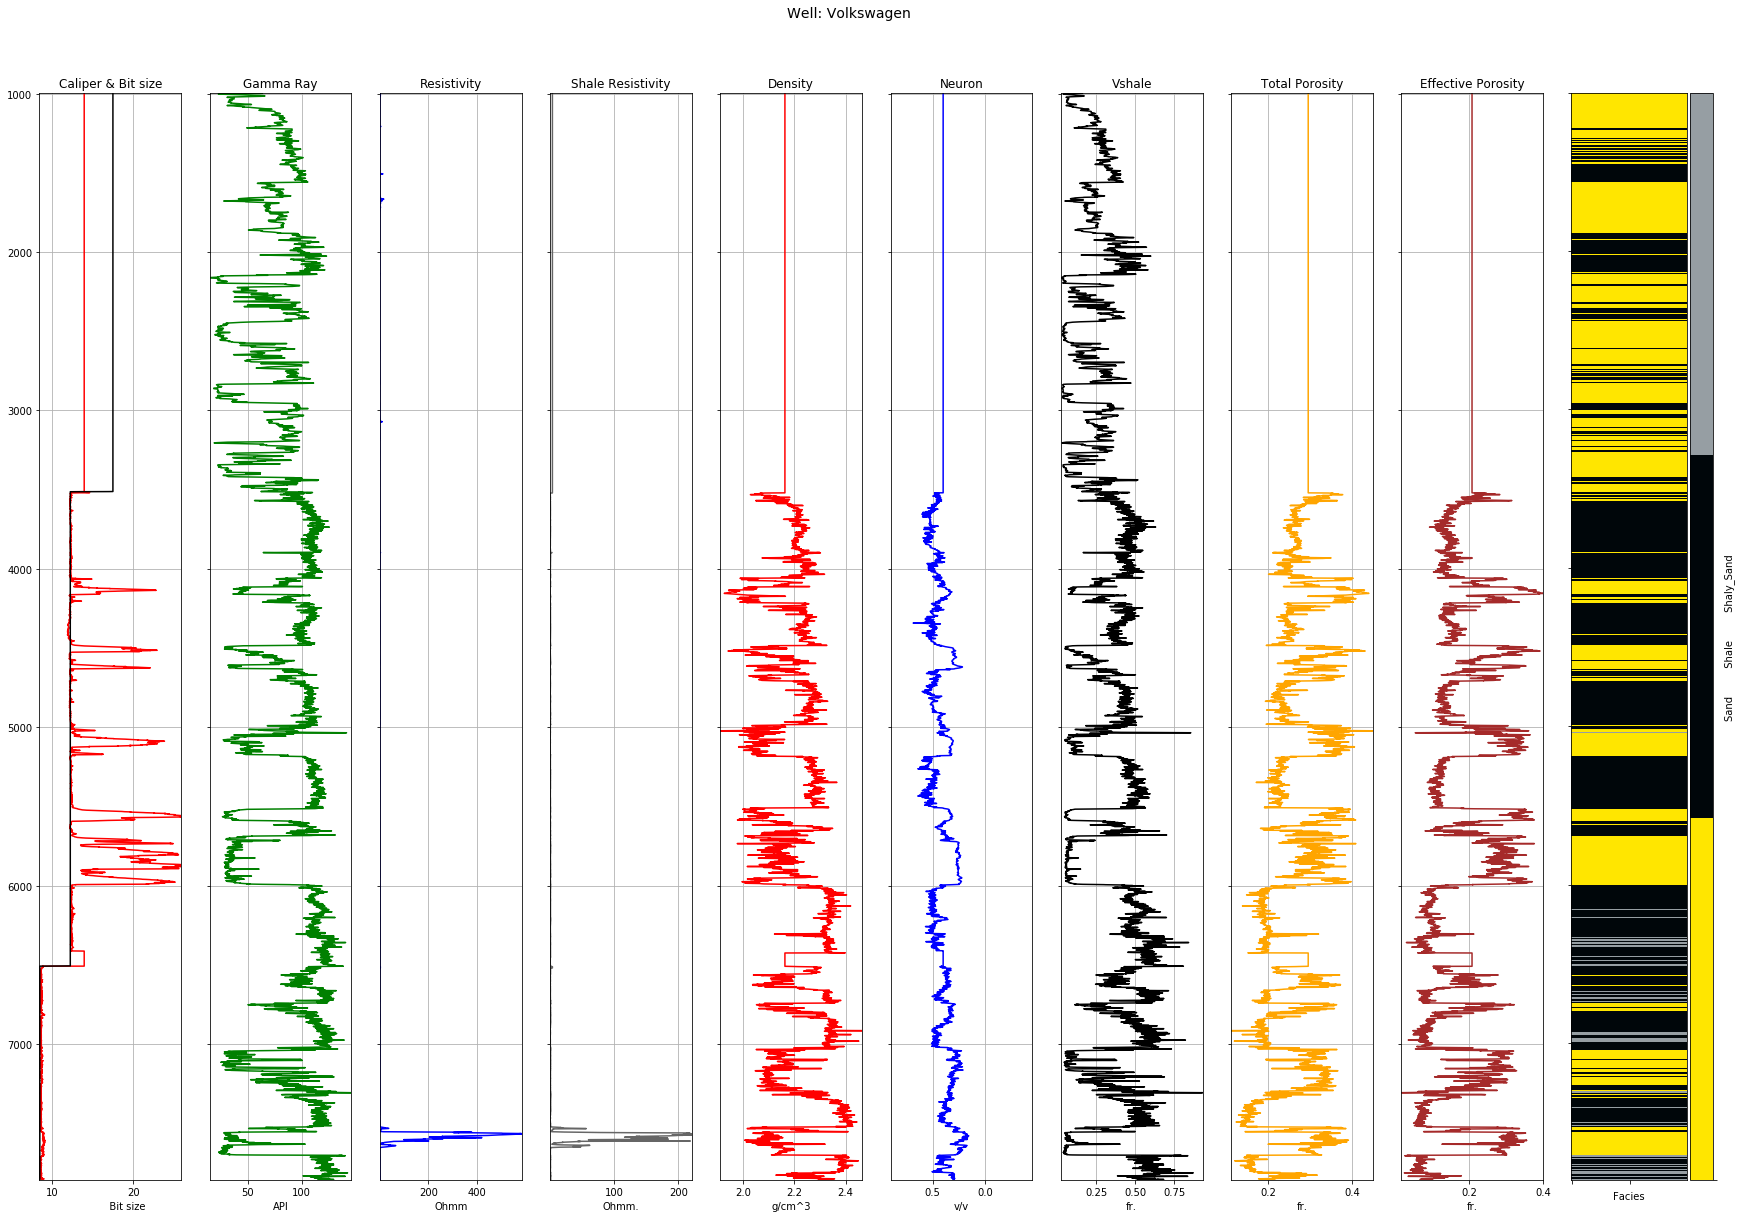

In [184]:
make_facies_log_plot(training_data[training_data['Well Name'] == 'Volkswagen'], facies_colors)
#plt.savefig("SHRIMPLIN_X1", dpi=400)

Sand          38401
Shale         46184
Shaly_Sand     1199
Name: Facies, dtype: int64

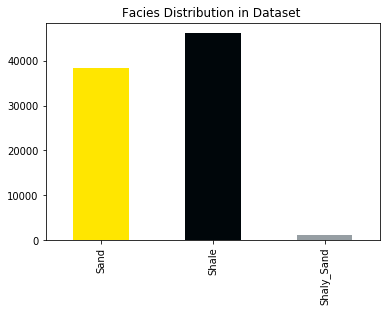

In [318]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Facies Distribution in Dataset ')
facies_counts
#plt.savefig("F_Dist.png", dpi=300)

In [319]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'BS_COMP', 'CALI_COMP',
       'GR_COMP', 'NP_COMP', 'RHOB_COMP', 'RSHAL_COMP', 'RT_COMP', 'Vsh',
       'PHIT', 'PHIE', 'FaciesLabels'],
      dtype='object')

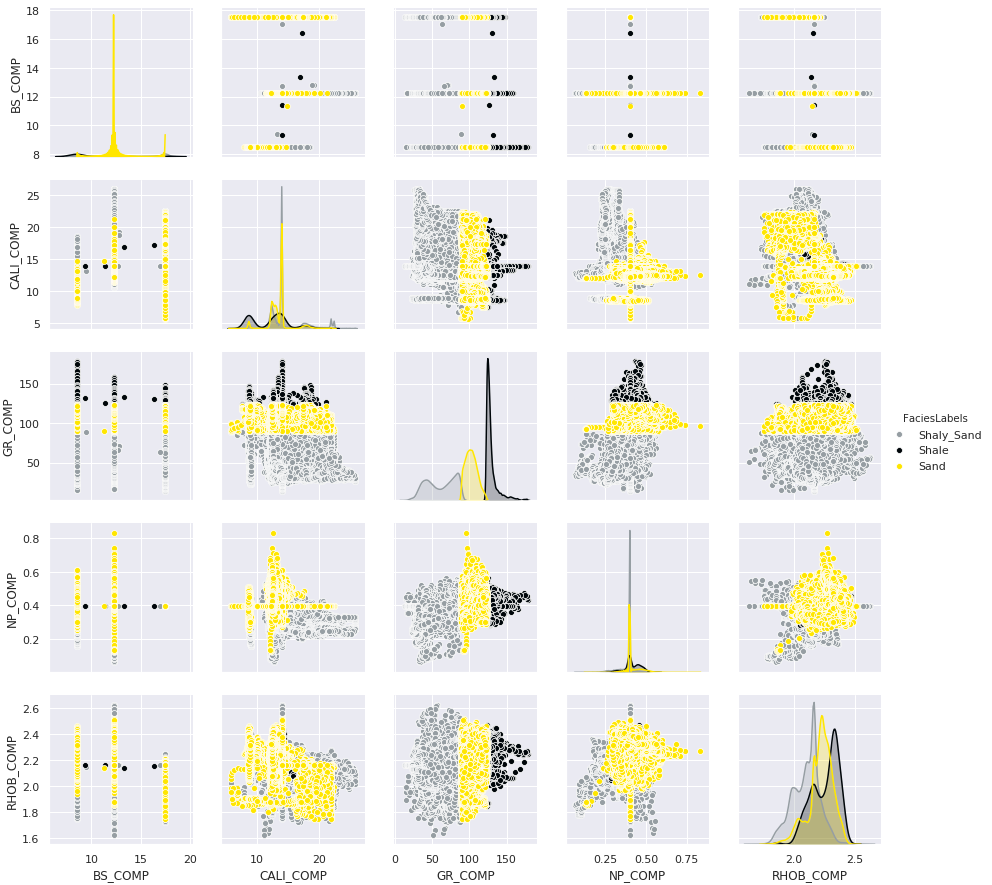

In [20]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth', 'RSHAL_COMP', 'RT_COMP', 'Vsh', 'PHIT', 'PHIE'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

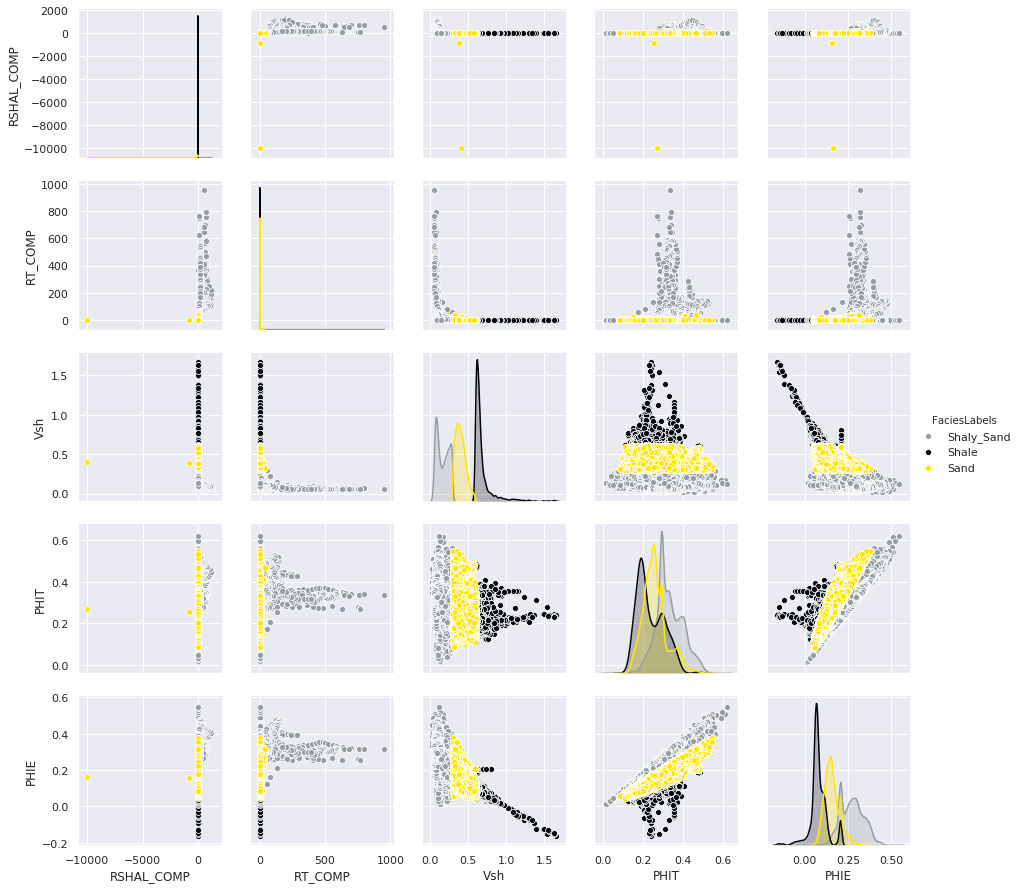

In [21]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','BS_COMP', 'CALI_COMP', 'GR_COMP', 'NP_COMP', 'RHOB_COMP'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [320]:
# Get correlation
training_data.corr()

,Facies,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE
Facies,1.000000,0.134367,-0.205765,-0.246644,0.831447,0.357901,0.477476,-0.047429,-0.067494,0.863381,-0.477476,-0.730030
Depth,0.134367,1.000000,-0.644739,-0.454022,0.088679,-0.077119,0.602665,0.011720,0.042055,0.112223,-0.602665,-0.417678
BS_COMP,-0.205765,-0.644739,1.000000,0.671685,-0.149568,0.036272,-0.463514,-0.006381,-0.058160,-0.178018,0.463514,0.351543
CALI_COMP,-0.246644,-0.454022,0.671685,1.000000,-0.232435,-0.033340,-0.515910,-0.009346,-0.059331,-0.250372,0.515910,0.460946
GR_COMP,0.831447,0.088679,-0.149568,-0.232435,1.000000,0.453486,0.446276,-0.073373,-0.120602,0.973808,-0.446276,-0.766220
...,...,...,...,...,...,...,...,...,...,...,...,...
RSHAL_COMP,-0.047429,0.011720,-0.006381,-0.009346,-0.073373,-0.121678,-0.044237,1.000000,0.410890,-0.063302,0.044237,0.066626
RT_COMP,-0.067494,0.042055,-0.058160,-0.059331,-0.120602,-0.212704,-0.043215,0.410890,1.000000,-0.098998,0.043215,0.086170
Vsh,0.863381,0.112223,-0.178018,-0.250372,0.973808,0.429943,0.461756,-0.063302,-0.098998,1.000000,-0.461756,-0.783702
PHIT,-0.477476,-0.602665,0.463514,0.515910,-0.446276,-0.178136,-1.000000,0.044237,0.043215,-0.461756,1.000000,0.888022


(0, 12)

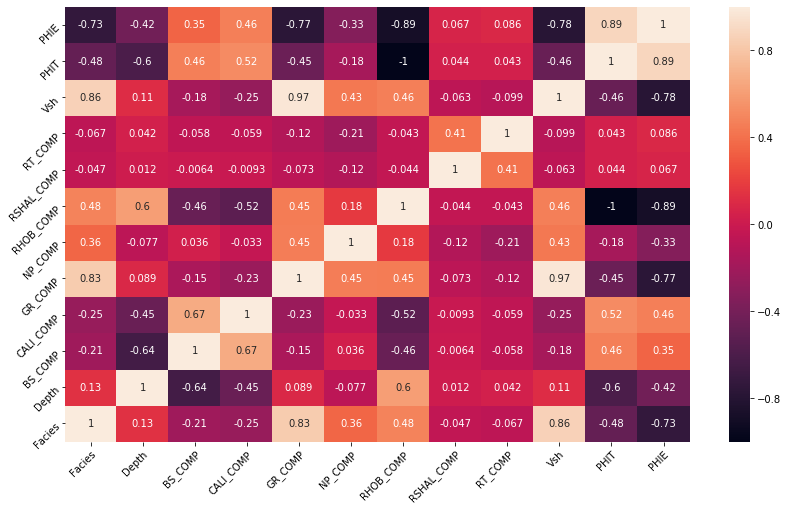

In [321]:
# Visualize data
%matplotlib inline
plt.figure(figsize=(14,8))

ax = sns.heatmap(training_data.corr(), annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(training_data)-85784,12)

In [322]:
training_data

,Facies,Formation,Well Name,Depth,BS_COMP,CALI_COMP,GR_COMP,NP_COMP,RHOB_COMP,RSHAL_COMP,RT_COMP,Vsh,PHIT,PHIE,FaciesLabels
14473,0,UN_DEF,Nissan,1211.5,12.25,13.963978,50.252399,0.399114,1.9355,4.111655,2.467025,0.112985,0.433030,0.384104,Sand
14474,0,UN_DEF,Nissan,1212.0,12.25,13.963978,48.469002,0.399114,1.9345,4.111655,2.467025,0.107099,0.433636,0.387194,Sand
14475,0,UN_DEF,Nissan,1212.5,12.25,13.963978,48.447800,0.399114,1.9345,4.111655,2.467025,0.107030,0.433636,0.387224,Sand
14476,0,UN_DEF,Nissan,1213.0,12.25,13.963978,49.690102,0.399114,1.9352,4.111655,2.467025,0.111110,0.433212,0.385078,Sand
14477,0,UN_DEF,Nissan,1213.5,12.25,13.963978,52.713402,0.399114,1.9369,4.111655,2.467025,0.121407,0.432182,0.379712,Sand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100252,2,UN_DEF,Volkswagen,7855.0,8.50,8.686700,129.890198,0.292816,2.3077,1.523900,1.372900,0.681831,0.207455,0.066006,Shaly_Sand
100253,2,UN_DEF,Volkswagen,7855.5,8.50,8.728200,126.535400,0.292117,2.3013,1.560500,1.485200,0.639196,0.211333,0.076250,Shaly_Sand
100254,2,UN_DEF,Volkswagen,7856.0,8.50,8.765600,127.410301,0.294720,2.3012,1.555700,1.487000,0.650080,0.211394,0.073971,Shaly_Sand
100255,2,UN_DEF,Volkswagen,7856.5,8.50,8.728300,124.798599,0.301075,2.2983,1.551100,1.400000,0.618065,0.213151,0.081410,Shaly_Sand


In [323]:
correct_facies_labels = training_data['Facies'].values
feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [324]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_facies_labels, 
                                                    test_size=0.20, random_state=42, stratify = correct_facies_labels)

### Support Vector Machine Model

In [326]:
from sklearn import svm
SVM_model = svm.SVC(C=100, kernel='sigmoid', degree=3, gamma='scale')

In [ ]:
SVM_model.fit(X_train,y_train)

In [ ]:
yhat_SVM = SVM_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
#from classification_utilities import display_cm, display_adj_cm

conf_SVM = confusion_matrix(y_test, yhat_SVM)
#display_cm(conf_SVM, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_SVM)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM_model,X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_SVM))

In [ ]:
print ("Accuracy: %d", (SVM_model.score(X_test,y_test)))
print ("Accuracy: %d", (SVM_model.score(X_train,y_train)))

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jSVM = jaccard_score(y_test, yhat_SVM, average = 'weighted')
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM Jaccard index: %.3f" % jSVM )
print("SVM F1-score: %.3f" % f1SVM  )

### Random Forest Model

In [134]:
from sklearn.ensemble import RandomForestClassifier   # import the model

RFC_model = RandomForestClassifier(n_estimators=2, criterion='entropy', max_depth=1, bootstrap=False)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=1,
                       n_estimators=2)

In [135]:
yhat_RFC = RFC_model.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix
#from classification_utilities import display_cm, display_adj_cm

conf_RFC = confusion_matrix(y_test, yhat_RFC)
#display_cm(conf_SVM, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_RFC)

[[4904 2793    0]
 [1995 7219    0]
 [  60  186    0]]


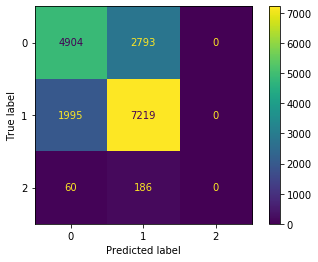

In [137]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFC_model,X_test,y_test)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_RFC))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      7697
           1       0.71      0.78      0.74      9214
           2       0.00      0.00      0.00       246

    accuracy                           0.71     17157
   macro avg       0.47      0.47      0.47     17157
weighted avg       0.70      0.71      0.70     17157



In [139]:
print ("Accuracy: %d", (RFC_model.score(X_test,y_test)))
print ("Accuracy: %d", (RFC_model.score(X_train,y_train)))

Accuracy: %d 0.7065920615492219
Accuracy: %d 0.7046934879857782


In [140]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jRFC = jaccard_score(y_test, yhat_RFC, average = 'weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
print("Random Forest Jaccard index: %.3f" % jRFC )
print("Random Forest F1-score: %.3f" % f1RFC  )

Random Forest Jaccard index: 0.544
Random Forest F1-score: 0.700


### Extra Tree Model

In [176]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(n_estimators=20, criterion='gini', max_depth=5)

extra_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=20)

In [177]:
yhat_extra = extra_clf.predict(X_test)

In [178]:
from sklearn.metrics import confusion_matrix
#from classification_utilities import display_cm, display_adj_cm

conf_extra = confusion_matrix(y_test, yhat_extra)
#display_cm(conf_SVM, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_extra)

[[6378 1319    0]
 [ 544 8670    0]
 [   2  219   25]]


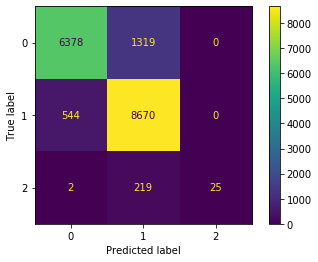

In [179]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(extra_clf,X_test,y_test)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_extra))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7697
           1       0.85      0.94      0.89      9214
           2       1.00      0.10      0.18       246

    accuracy                           0.88     17157
   macro avg       0.92      0.62      0.65     17157
weighted avg       0.88      0.88      0.87     17157



In [181]:
print ("Accuracy: %d", (extra_clf.score(X_test,y_test)))
print ("Accuracy: %d", (extra_clf.score(X_train,y_train)))

Accuracy: %d 0.8785335431602261
Accuracy: %d 0.8768269048625177


In [182]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jextra = jaccard_score(y_test, yhat_extra, average = 'weighted')
f1extra = f1_score(y_test, yhat_extra, average='weighted')
print("Extra Tree Jaccard index: %.3f" % jextra )
print("Extra Tree F1-score: %.3f" % f1extra  )

Extra Tree Jaccard index: 0.782
Extra Tree F1-score: 0.874


### K-Nearest Neighour Model

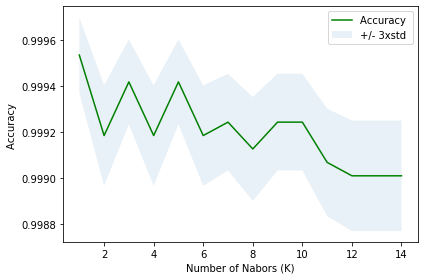

KNN Jaccard index: 0.998
KNN F1-score: 0.999
[[7694    3    0]
 [   8 9205    1]
 [   0    3  243]]


In [187]:
from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus 
Ks =15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)
    
    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k = 15    #it seems 5 is good enough
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=10, p=5 ).fit(X_train, y_train)
KNN_model
#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


yhat_KNN = KNN_model.predict(X_test)

jKNN  = jaccard_score(y_test, yhat_KNN, average='weighted')
f1KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("KNN Jaccard index: %.3f" % jKNN )
print("KNN F1-score: %.3f" % f1KNN  )

conf_KNN = confusion_matrix(y_test, yhat_KNN)
print(conf_KNN)
#display_cm(conf_KNN, facies_labels, hide_zeros=True, display_metrics=True)

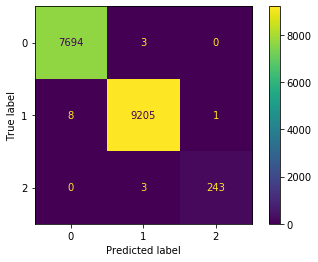

In [188]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_model,X_test,y_test)

In [189]:
print ("Accuracy: %d", (KNN_model.score(X_test,y_test)))
print ("Accuracy: %d", (KNN_model.score(X_train,y_train)))

Accuracy: %d 0.999125721279944
Accuracy: %d 0.9994754251242223


In [190]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jKNN = jaccard_score(y_test, yhat_KNN, average = 'weighted')
f1KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("K Nearest Neighour Jaccard index: %.3f" % jKNN )
print("K Nearest Neighour F1-score: %.3f" % f1KNN  )

K Nearest Neighour Jaccard index: 0.998
K Nearest Neighour F1-score: 0.999


### Logistic Regression Model

In [227]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(dual=True, C=1, solver='liblinear', max_iter=0.00000001 ).fit(X_train,y_train)
LR_model

yhat_LR = LR_model.predict(X_test)

jLR  = jaccard_score(y_test, yhat_LR, average='weighted')
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR Jaccard index: %.3f" % jLR )
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)
#display_cm(conf_LR, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_LR)

LR Jaccard index: 0.828
LR F1-score: 0.900
[[6626 1071    0]
 [ 279 8935    0]
 [   0  246    0]]


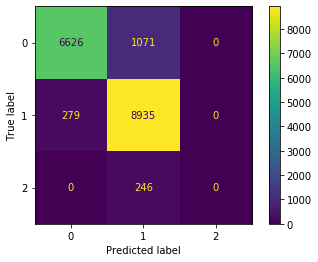

In [228]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR_model,X_test,y_test)

In [229]:
print ("Accuracy: %d", (LR_model.score(X_test,y_test)))
print ("Accuracy: %d", (LR_model.score(X_train,y_train)))

Accuracy: %d 0.9069767441860465
Accuracy: %d 0.9059699535168374


In [230]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jLR = jaccard_score(y_test, yhat_LR, average = 'weighted')
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("Logistic Regression Jaccard index: %.3f" % jLR )
print("Logistic Regression F1-score: %.3f" % f1LR  )

Logistic Regression Jaccard index: 0.828
Logistic Regression F1-score: 0.900


### Decision Tree Model

In [263]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", splitter='random', max_depth = 1, min_samples_split=50 )
DT_model.fit(X_train,y_train)
DT_model

yhat_DT = DT_model.predict(X_test)

jDT  = jaccard_score(y_test, yhat_DT, average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )

conf_DT = confusion_matrix(y_test, yhat_DT)
#display_cm(conf_DT, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_DT)

DT Jaccard index: 0.765
DT F1-score: 0.861
[[5707 1990    0]
 [   0 9214    0]
 [   0  246    0]]


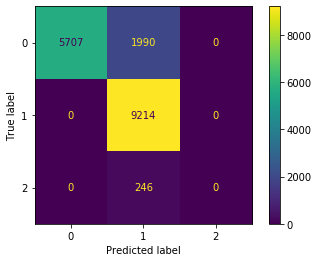

In [264]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT_model,X_test,y_test)

In [265]:
print ("Accuracy: %d", (DT_model.score(X_test,y_test)))
print ("Accuracy: %d", (DT_model.score(X_train,y_train)))

Accuracy: %d 0.8696741854636592
Accuracy: %d 0.8682588485581477


In [266]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jDT = jaccard_score(y_test, yhat_DT, average = 'weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("Decision Tree Jaccard index: %.3f" % jDT )
print("Decision Tree F1-score: %.3f" % f1DT  )

Decision Tree Jaccard index: 0.765
Decision Tree F1-score: 0.861


### Neural Network Classifier

In [295]:
from sklearn.neural_network import MLPClassifier


NNC_model = MLPClassifier(alpha=0.01, max_iter=1, learning_rate_init=0.0001, 
                          solver='adam', hidden_layer_sizes=100, shuffle=False ).fit(X_train, y_train)

yhat_NNC = NNC_model.predict(X_test)
jNNC  =  jaccard_score(y_test, yhat_NNC, average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

conf_NNC = confusion_matrix(y_test, yhat_NNC)
#display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)
print(conf_NNC)

NNC Jaccard index: 0.794
NNC F1-score: 0.880
[[6405 1292    0]
 [ 408 8806    0]
 [   0  246    0]]


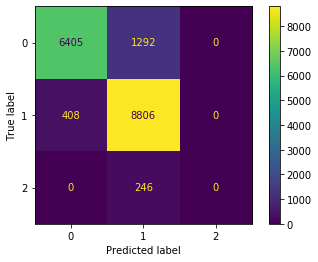

In [296]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NNC_model,X_test,y_test)

In [298]:
Acc_NNC = NNC_model.score(X_test,y_test)
print ("Accuracy: %d", (NNC_model.score(X_test,y_test)))
print ("Accuracy: %d", (NNC_model.score(X_train,y_train)))

Accuracy: %d 0.8865769073847409
Accuracy: %d 0.8861672519562271


#### Table E1, Create dataframe of model evaluation 

In [147]:
# create dictionary with calculated errors as variables
data_frame1 ={'Model type': ['SVM', 'RFC', 'ETM', 'KNN', 'DT', 'LR', 'NNC'],
       'Jaccard index': [jSVM, jRFC, jextra, jKNN, jDT, jLR, jNNC],
       'F1-Score': [f1SVM, f1RFC, f1extra, f1KNN, f1DT, f1LR, f1NNC]
    
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','Jaccard index','F1-Score' ] )
df1.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.99,1.00
1,RFC,1.00,1.00
2,ETM,1.00,1.00
3,KNN,0.99,0.99
4,DT,1.00,1.00
5,LR,1.00,1.00
6,NNC,1.00,1.00


### Applying the classification model to the blind data

As we selected one well out of the training data from traning and model fitting process, it can be good estimate to see how models work.

In [148]:
y_blind = blind['Facies'].values

In [149]:
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [150]:
X_blind = scaler.transform(blind_features)

In [151]:
#SVM
yhat_blind_SVM = SVM_model.predict(X_blind)
blind['SVM_Pred'] = yhat_blind_SVM

#ETM
yhat_blind_extra = extra_clf.predict(X_blind)
blind['Extra_Pred'] = yhat_blind_extra

#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC

#KNN
yhat_blind_KNN = KNN_model.predict(X_blind)
blind['KNN_Pred'] = yhat_blind_KNN

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT

#LR
yhat_blind_LR = LR_model.predict(X_blind)
blind['LR_Pred'] = yhat_blind_LR

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC

### Let's see how prediction works on blind data:

In [152]:
#SVM
jSVM_b =  jaccard_score(y_blind, yhat_blind_SVM, average='weighted')
f1SVM_b = f1_score(y_blind, yhat_blind_SVM, average='weighted')
# print("SVM Jaccard index for blind well prediction: %.3f" %jSVM_b)
# print("SVM F1-score for blind well prediction: %.3f" %f1SVM_b )

#GPC
jExtra_b =jaccard_score(y_blind, yhat_blind_extra, average='weighted')
f1Extra_b =f1_score(y_blind, yhat_blind_extra, average='weighted')
# print("GPC Jaccard index for blind well prediction: %.3f" %jGPC_b )
# print("GPC F1-score for blind well prediction: %.3f" % f1GPC_b)

#RFC
jRFC_b =jaccard_score(y_blind, yhat_blind_RFC, average='weighted')
f1RFC_b=f1_score(y_blind, yhat_blind_RFC, average='weighted')
# print("RFC Jaccard index for blind well prediction: %.3f" % jRFC_b)
# print("RFC F1-score for blind well prediction: %.3f" % f1RFC_b)

#KNN
jKNN_b = jaccard_score(y_blind, yhat_blind_KNN, average='weighted')
f1KNN_b = f1_score(y_blind, yhat_blind_KNN, average='weighted')
# print("KNN Jaccard index for blind well prediction: %.3f" % jKNN_b)
# print("KNN F1-score for blind well prediction: %.3f" %f1KNN_b  )

#DT
jDT_b = jaccard_score(y_blind, yhat_blind_DT, average='weighted')
f1DT_b =f1_score(y_blind, yhat_blind_DT, average='weighted')
# print("DT Jaccard index for blind well prediction: %.3f" % jDT_b)
# print("DT F1-score for blind well prediction: %.3f" % f1DT_b )

#LR
jLR_b  = jaccard_score(y_blind, yhat_blind_LR, average='weighted')
f1LR_b = f1_score(y_blind, yhat_blind_LR, average='weighted')
# print("LR Jaccard index for blind well prediction: %.3f" % jLR_b)
# print("LR F1-score for blind well prediction: %.3f" %f1LR_b )

#NNC
jNNC_b  =jaccard_score(y_blind, yhat_blind_NNC, average='weighted')
f1NNC_b =f1_score(y_blind, yhat_blind_NNC, average='weighted')
# print("NNC Jaccard index for blind well prediction: %.3f" %jNNC_b )
# print("NNC F1-score for blind well prediction: %.3f" %f1NNC_b )

### Table E2, Create dataframe of model evaluation for blind well performance

In [153]:
data_frame2 ={'Model type': ['SVM', 'RFC', 'ETM', 'KNN', 'DT', 'LR', 'NNC'],
       'Jaccard index': [jSVM_b, jRFC_b, jExtra_b, jKNN_b, jDT_b, jLR_b, jNNC_b],
       'F1-Score': [f1SVM_b, f1RFC_b, f1Extra_b, f1KNN_b, f1DT_b, f1LR_b, f1NNC_b]
            }
df2 = pd.DataFrame(data_frame2, columns = ['Model type','Jaccard index','F1-Score' ] )
df2.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.96,0.98
1,RFC,1.00,1.00
2,ETM,1.00,1.00
3,KNN,0.98,0.99
4,DT,1.00,1.00
5,LR,0.99,1.00
6,NNC,1.00,1.00


In [156]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    
    
    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(30, 20))
    
    ax[0].plot(logs.CALI_COMP, logs.Depth, '-', color='red')
    ax[0].plot(logs.BS_COMP, logs.Depth, '-', color='black')
    ax[1].plot(logs.GR_COMP, logs.Depth, '-g')
    ax[2].plot(logs.RT_COMP, logs.Depth, '-', color='blue')
    ax[3].plot(logs.RSHAL_COMP, logs.Depth, '-', color='0.40')
    ax[4].plot(logs.RHOB_COMP, logs.Depth, '-', color='red')
    ax[5].plot(logs.NP_COMP, logs.Depth, '-', color='blue')
    ax[6].plot(logs.Vsh, logs.Depth, '-', color='black')
    ax[7].plot(logs.PHIT, logs.Depth, '-', color='orange')
    ax[8].plot(logs.PHIE, logs.Depth, '-', color='brown')
    im1 = ax[9].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=2)
    im2 = ax[10].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=2)
    
    divider = make_axes_locatable(ax[10])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((9*' ').join(['Sand', 'Shaly_Sand', 'Shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    ax[0].set_title('Caliper & Bit size', style ='normal')
    ax[0].set_xlabel("inch &        ")
    ax[0].set_xlim(logs.CALI_COMP.min(),logs.CALI_COMP.max())
    ax[0].set_xlabel("           Bit size")
    #ax[0].set_xlim(logs.BS_COMP.min(),logs.BS_COMP.max())
    ax[1].set_title('Gamma Ray', style ='normal')
    ax[1].set_xlabel("API")
    ax[1].set_xlim(logs.GR_COMP.min(),logs.GR_COMP.max())
    ax[2].set_title('Resistivity', style ='normal')
    ax[2].set_xlim(logs.RT_COMP.min(),logs.RT_COMP.max())
    ax[2].set_xlabel("Ohmm")
    ax[3].set_title('Shale Resistivity', style ='normal')
    ax[3].set_xlabel("Ohmm.")
    ax[3].set_xlim(logs.RSHAL_COMP.min(),logs.RSHAL_COMP.max())
    ax[4].set_title('Density', style ='normal')
    ax[4].set_xlabel("g/cm^3")
    ax[4].set_xlim(logs.RHOB_COMP.min(),logs.RHOB_COMP.max())
    ax[5].set_title('Neuron', style ='normal')
    ax[5].set_xlabel("v/v")
    ax[5].set_xlim(0.9, -0.45)
    ax[6].set_title('Vshale', style ='normal')
    ax[6].set_xlabel("fr.")
    ax[6].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    ax[7].set_title('Total Porosity', style ='normal')
    ax[7].set_xlabel("fr.")
    ax[7].set_xlim(logs.PHIT.min(),logs.PHIT.max())
    ax[8].set_title('Effective Porosity', style ='normal')
    ax[8].set_xlabel("fr.")
    ax[8].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[9].set_xlabel('Facies')
    ax[10].set_xlabel(compadre)
    
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[10].set_xticklabels([])
    ax[9].set_yticklabels([])
    ax[10].set_xticklabels([])
    

    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

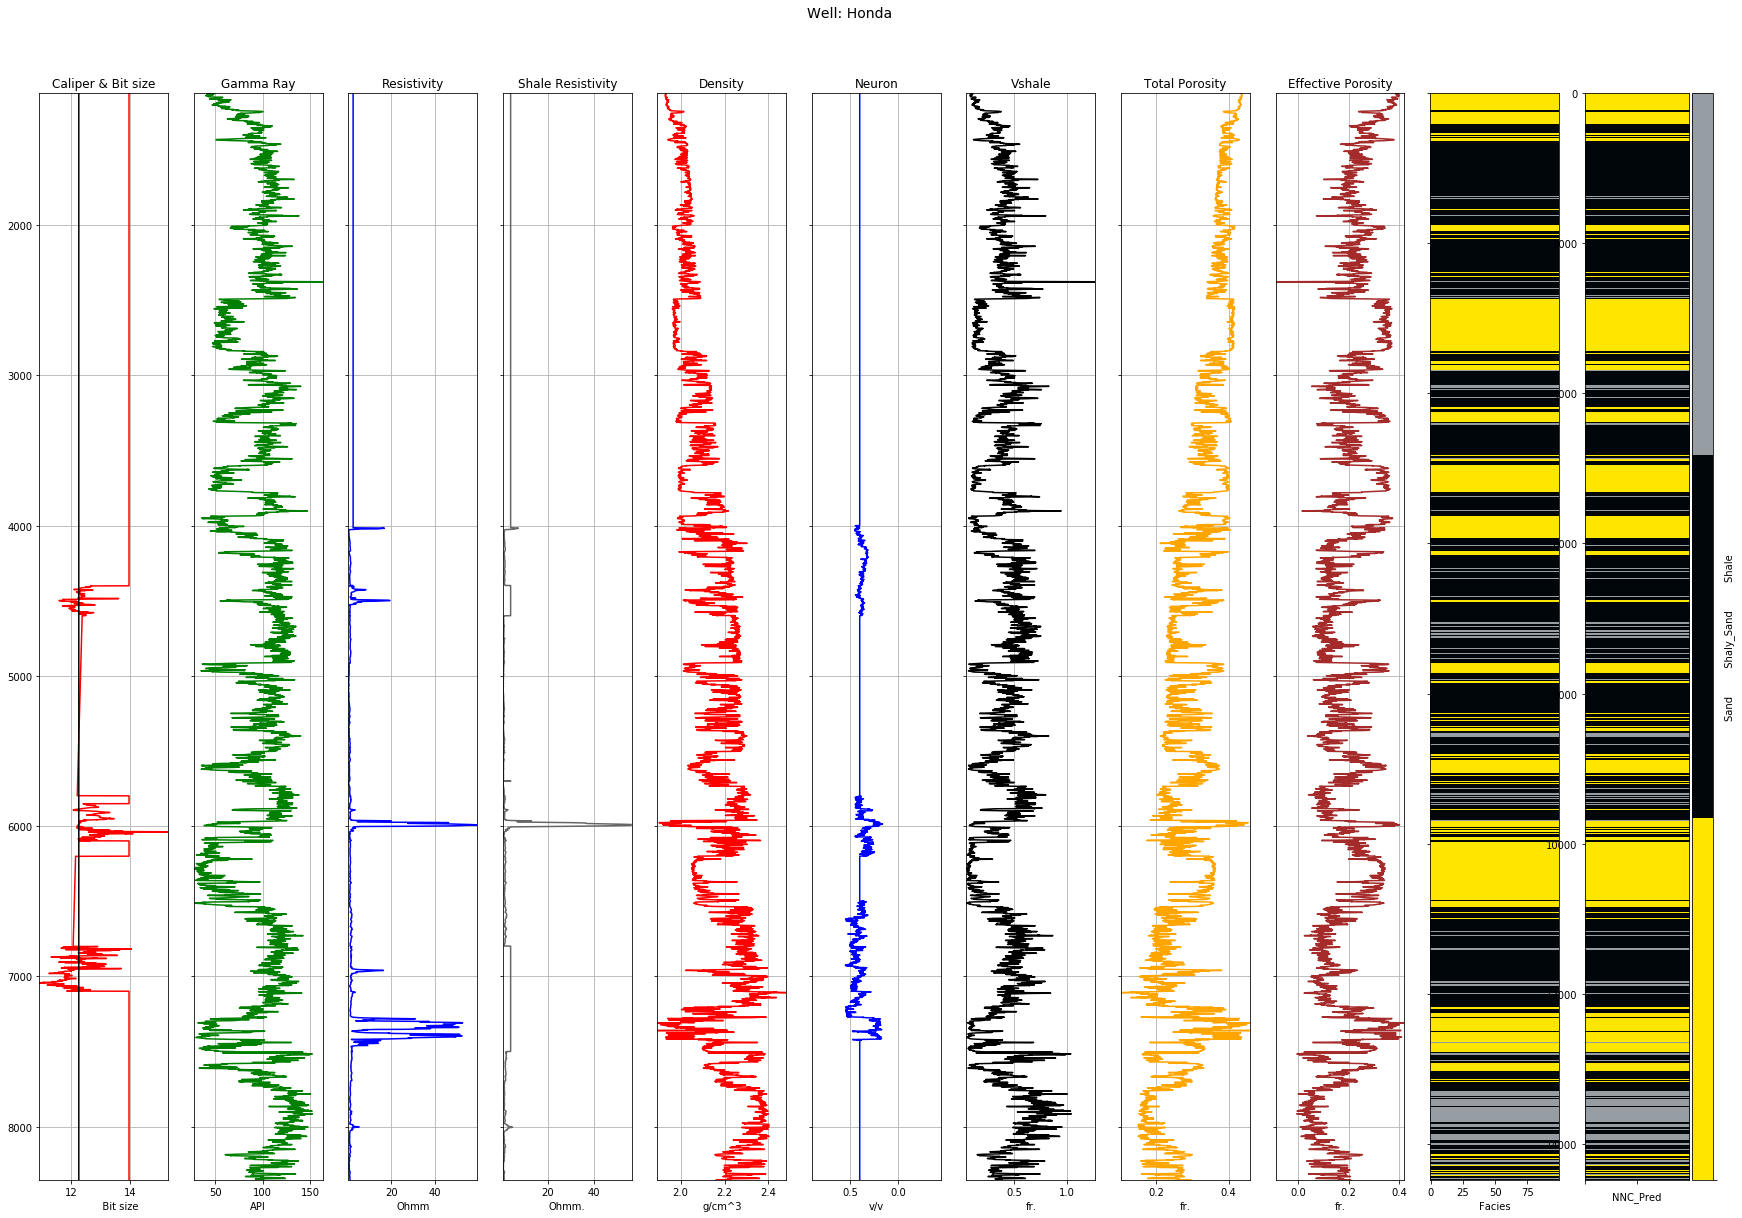

In [157]:
#let's plot KNN result
compare_facies_plot(blind, 'NNC_Pred', facies_colors)
#plt.savefig("KNN.png", dpi=400)

In [160]:
def compare_all_facies(logs, Pred1, Pred2, Pred3, Pred4, Pred5, Pred6, Pred7, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[Pred4].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[Pred5].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[Pred6].values,1), 100, 1)
    cluster8 = np.repeat(np.expand_dims(logs[Pred7].values,1), 100, 1)

   
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(30, 20))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im5 = ax[4].imshow(cluster5, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im6 = ax[5].imshow(cluster6, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im7 = ax[6].imshow(cluster7, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
    im8 = ax[7].imshow(cluster8, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=0,vmax=2)
       
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im8, cax=cax)
    cbar.set_label((5*' ').join(['Sand' , 'Shaly_Sand', 'Shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred1); ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3); ax[4].set_xlabel(Pred4); ax[5].set_xlabel(Pred5)
    ax[6].set_xlabel(Pred6); ax[7].set_xlabel(Pred7)
    
    #ax[0].set_yticklabels([]) ;
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]) 
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([])
    ax[3].set_xticklabels([]); ax[4].set_xticklabels([]); ax[5].set_xticklabels([])
    ax[6].set_xticklabels([]); ax[7].set_xticklabels([])

    f.suptitle('Various model predictions in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

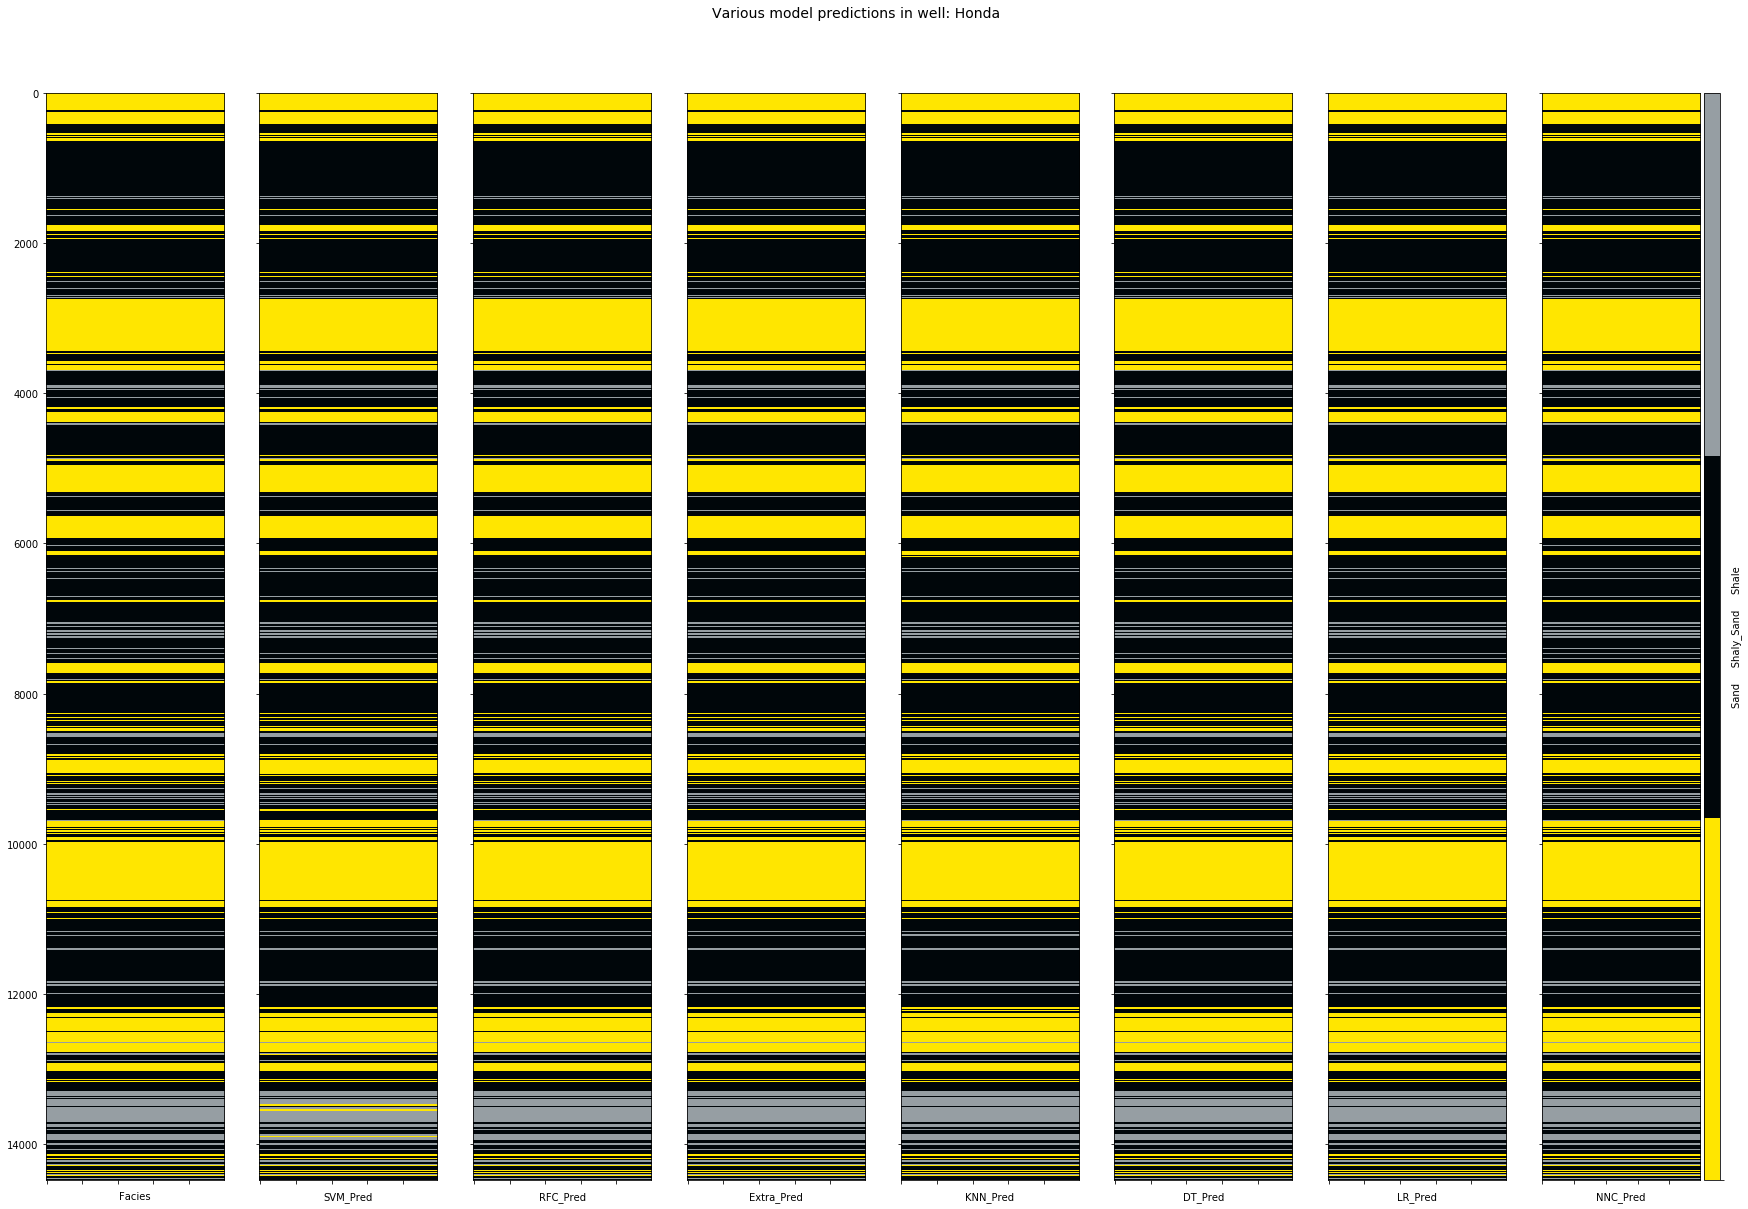

In [161]:
compare_all_facies(blind,'SVM_Pred', 'RFC_Pred', 'Extra_Pred', 'KNN_Pred','DT_Pred', 'LR_Pred', 'NNC_Pred', facies_colors)
#plt.savefig("Compo.png", dpi=400)